In [2]:
import os
import re
import xml.etree.ElementTree as ET
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from grobid_client.grobid_client import GrobidClient

In [5]:
client = GrobidClient(config_path="./config.json")
client.process("processFulltextDocument", ".", output="./output/", consolidate_citations=True, tei_coordinates=True, n=20)

GROBID server does not appear up and running, the connection to the server failed


ServerUnavailableException: 

In [50]:
def extract_introduction_text(root):
    # Variable para almacenar el texto de la introducción
    introduction_text = ""

    # Buscar el apartado con la cabecera "Introducción"
    introduction_section = None
    for div in root.findall(".//{http://www.tei-c.org/ns/1.0}div"):
        head = div.find("{http://www.tei-c.org/ns/1.0}head")
        if head is not None and head.text.lower() == "introduction":
            introduction_section = div
            break

    # Concatenar el texto de los párrafos en la introducción
    if introduction_section is not None:
        for paragraph in introduction_section.findall(".//{http://www.tei-c.org/ns/1.0}p"):
            if paragraph.text:
                introduction_text += paragraph.text.strip() + " "
    else:
        introduction_text = "No se encontró la sección de Introducción."

    return introduction_text.strip()

def wordcloud_pdf(root):
    introducion_text = extract_introduction_text(root)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(introducion_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Keyword Cloud based on Introduction text')
    plt.show()

def contador_figuras(root):
    # Variable para almacenar el texto de la introducción
    contador  = 0

    # Buscar el apartado con la cabecera "Introducción"
    for div in root.findall(".//{http://www.tei-c.org/ns/1.0}figure"):
        contador += 1

    return contador
        
# Función para encontrar y extraer enlaces de texto
def encontrar_enlaces(texto):
    regex = r"https?://[^\s<>\"\']+"
    return set(re.findall(regex, texto))

# Función recursiva para buscar enlaces en elementos y subelementos
def buscar_enlaces(elemento):
    enlaces = set()
    for child in elemento:
        if child.text:
            enlaces.update(encontrar_enlaces(child.text))
        enlaces.update(buscar_enlaces(child))
    return enlaces

def histograma_figuras(listado_archivos, numero_figuras_paper):
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(listado_archivos, numero_figuras_paper)

    plt.xlabel('Archivo XML')
    plt.ylabel('Número de Figuras')
    plt.title('Número de Figuras por Archivo XML')
    plt.xticks(rotation=90)  # Rotar etiquetas del eje x para una mejor legibilidad
    plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
    plt.show()

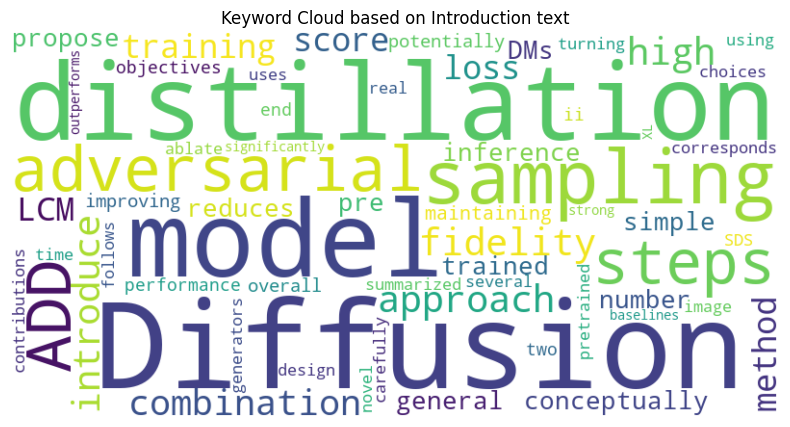

['https://huggingface.co/latent-consistency/lcm-lora-sdxl', 'https://huggingface.', 'https://github.com/deep-floyd/IF', 'https://huggingface.co/openMUSE', 'https://github.com/Stability-AI/generative-models', 'https://github.com/CompVis/stable-diffusion', 'https://app.prolific.com']


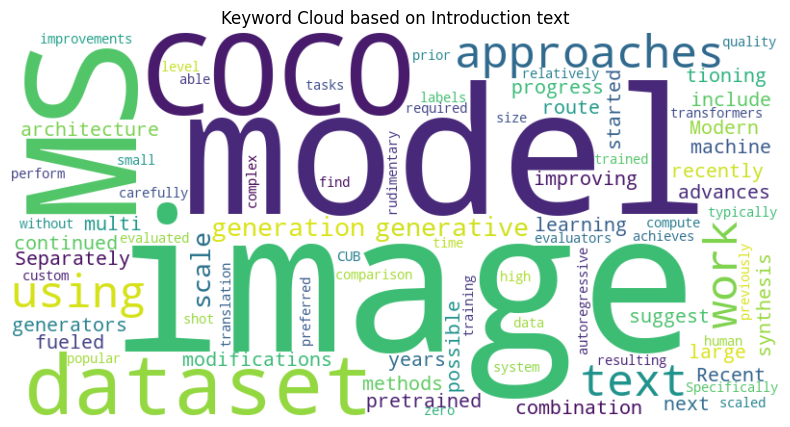

['https://github.com/openai/DALL-E']


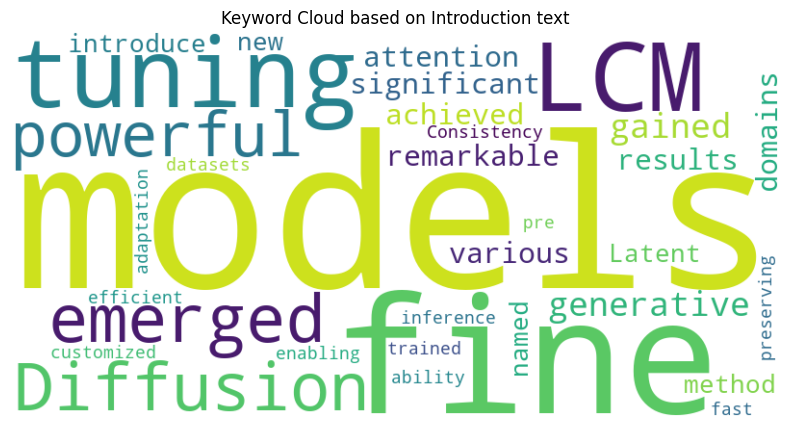

[]


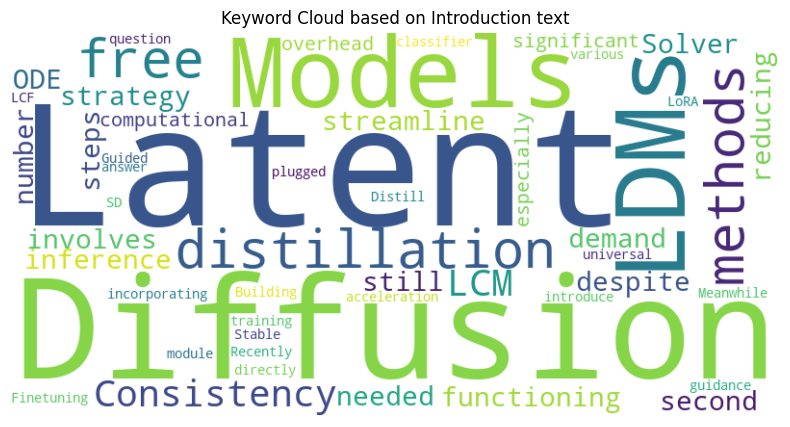

['https://github.com/luosiallen/']


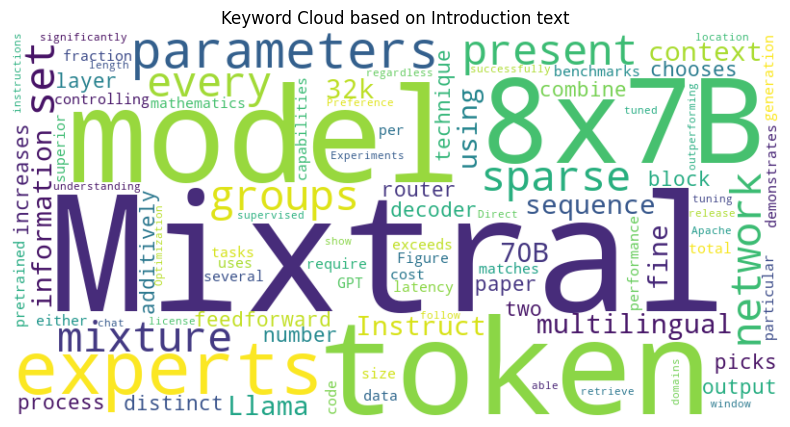

['https://huggingface.co/spaces/lmsys/chatbot-arena-leaderboard', 'https://mistral.ai/news/mixtral-of-experts/']


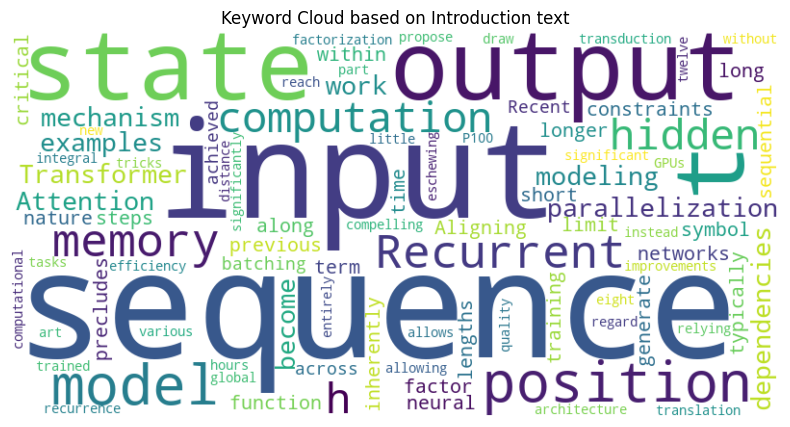

['https://github.com/']


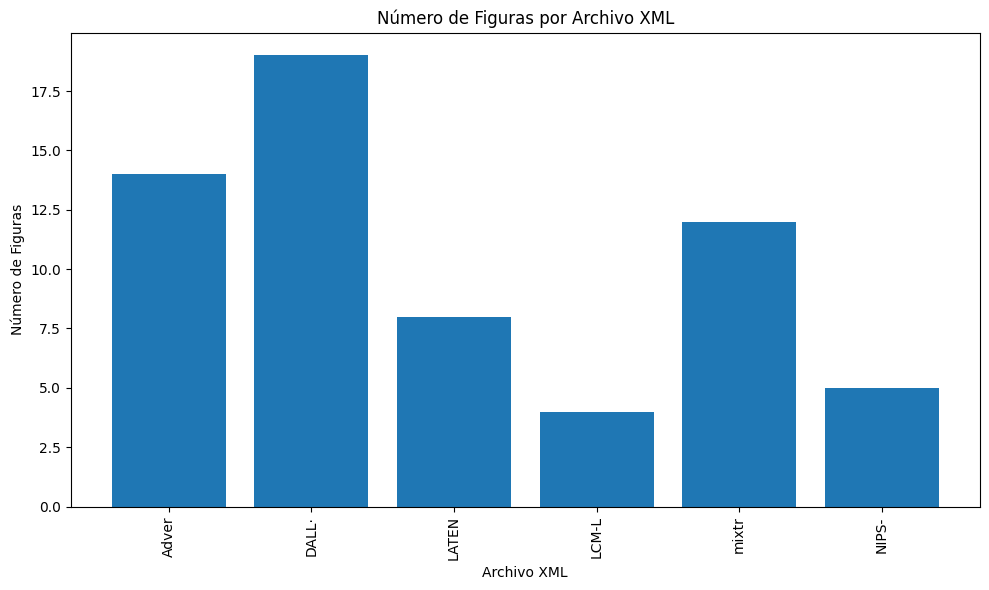

In [51]:
# Directorio donde se encuentran los archivos XML
directorio = './output/papers'
numero_figuras_paper = []
listado_archivos = []

# Bucle para recorrer todos los archivos en el directorio
for archivo in os.listdir(directorio):
    if archivo.endswith('.xml'):  # Verificar si el archivo es un XML
        listado_archivos.append(archivo[:5])
        ruta_completa = os.path.join(directorio, archivo)
        
        tree = ET.parse(ruta_completa)
        root = tree.getroot()

        wordcloud_pdf(root)

        numero_figuras_paper.append(contador_figuras(root))

        print(list(buscar_enlaces(root)))

histograma_figuras(listado_archivos, numero_figuras_paper)
